# Grover's Search Algorithm

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

In [2]:
n = 2 # Number of input qubits

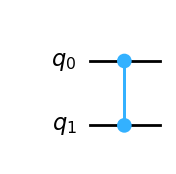

In [3]:
oc = QuantumCircuit(n, name='Oracle')
oc.cz(0, 1)
oracle_gate = oc.to_gate()
oc.draw(output='mpl')

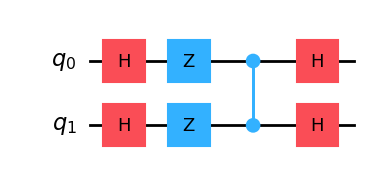

In [4]:
rc = QuantumCircuit(n, name='Reflection')
rc.h(range(n))
rc.z(range(n))
rc.cz(0, 1)
rc.h(range(n))
reflection_gate = rc.to_gate()
rc.draw(output='mpl')

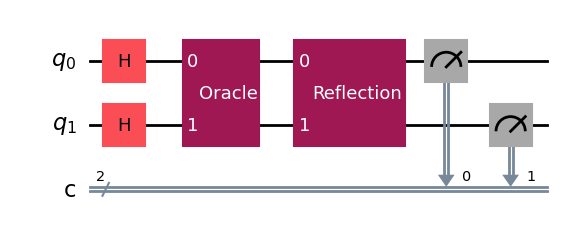

In [5]:
qc = QuantumCircuit(n, n) # Main quantum circuit
qc.h(range(n))
qc.append(oracle_gate, range(n))
qc.append(reflection_gate, range(n))
qc.measure(range(n), range(n))
qc.draw(output='mpl')

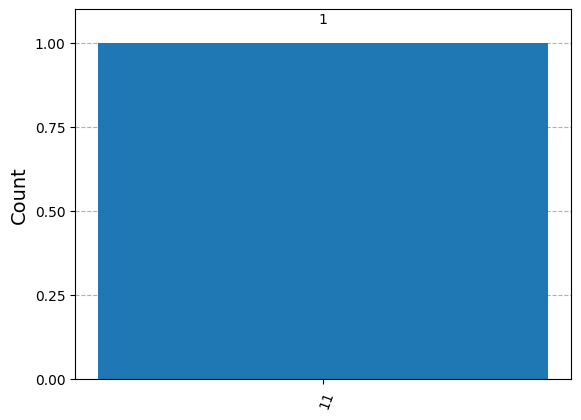

In [6]:
# Execute code on a simulator
qc = qc.decompose(reps=5)
backend = AerSimulator()
result = backend.run(qc, shots=1).result()
counts = result.get_counts(qc)
plot_histogram(counts)